In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("Amazon_Sale_Report.csv")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15152\2944546609.py:3: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon_Sale_Report.csv")


In [5]:
df.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [8]:
df.shape

(128975, 24)

In [7]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [10]:
df.drop(columns=['index'], inplace=True, errors='ignore')


In [11]:
df.tail(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,S,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [12]:
#sku - stock keeping unit

print(df['Order ID'].duplicated().sum())

print(df[['Order ID', 'SKU']].duplicated().sum())

print(df[['Order ID', 'SKU', 'Size']].duplicated().sum())

print(df[['Order ID', 'Style', 'Qty']].duplicated().sum())


8597
7
7
396


In [13]:
df.drop_duplicates(subset=['Order ID', 'SKU', 'Size'], inplace=True)


In [14]:
df[['Order ID', 'SKU', 'Size']].duplicated().sum()


0

In [8]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128968.000000,128968.000000,121176.000000,128935.000000
mean,64486.814784,0.904449,648.557109,463965.409873
std,37232.594077,0.313331,281.210629,191475.232007
min,0.000000,0.000000,0.000000,110001.000000
25%,32242.750000,1.000000,449.000000,382421.000000
50%,64486.500000,1.000000,605.000000,500033.000000
75%,96731.250000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [15]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
Index: 128968 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128968 non-null  object 
 1   Date                128968 non-null  object 
 2   Status              128968 non-null  object 
 3   Fulfilment          128968 non-null  object 
 4   Sales Channel       128968 non-null  object 
 5   ship-service-level  128968 non-null  object 
 6   Style               128968 non-null  object 
 7   SKU                 128968 non-null  object 
 8   Category            128968 non-null  object 
 9   Size                128968 non-null  object 
 10  ASIN                128968 non-null  object 
 11  Courier Status      122096 non-null  object 
 12  Qty                 128968 non-null  int64  
 13  currency            121176 non-null  object 
 14  Amount              121176 non-null  float64
 15  ship-city           128935 non-null  ob

In [16]:
#changing data type
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')
#df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y", errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], format="%m-%d-%y", errors='coerce')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 128968 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128968 non-null  object        
 1   Date                128968 non-null  datetime64[ns]
 2   Status              128968 non-null  object        
 3   Fulfilment          128968 non-null  object        
 4   Sales Channel       128968 non-null  object        
 5   ship-service-level  128968 non-null  object        
 6   Style               128968 non-null  object        
 7   SKU                 128968 non-null  object        
 8   Category            128968 non-null  object        
 9   Size                128968 non-null  object        
 10  ASIN                128968 non-null  object        
 11  Courier Status      122096 non-null  object        
 12  Qty                 128968 non-null  int64         
 13  currency            121176 non-nul

In [17]:
df.isnull()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
128971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
128972,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
128973,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [18]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7792
Amount                 7792
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49150
B2B                       0
fulfilled-by          89691
Unnamed: 22           49048
dtype: int64

In [19]:
#dropping columns which are not required 
df.drop(columns=['Unnamed: 22', 'promotion-ids', 'fulfilled-by'], inplace=True)



In [14]:
#checking other columns whether to drop them or fill them
df['Courier Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [20]:
df['Courier Status'].fillna('UNKNOWN', inplace = True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15152\702209816.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier Status'].fillna('UNKNOWN', inplace = True)


In [21]:
df['currency'].unique()

array(['INR', nan], dtype=object)

In [22]:
df['currency'] = df['currency'].fillna('INR')


In [18]:
df['Amount'] = df['Amount'].fillna('0.0')

In [23]:
#here city state are useful so lets check what are frequent in them
print(df['ship-city'].mode())

print(df['ship-state'].mode())

print(df['ship-country'].mode())


0    BENGALURU
Name: ship-city, dtype: object
0    MAHARASHTRA
Name: ship-state, dtype: object
0    IN
Name: ship-country, dtype: object


In [20]:
df['Date'].head()

0   2022-04-30
1   2022-04-30
2   2022-04-30
3   2022-04-30
4   2022-04-30
Name: Date, dtype: datetime64[ns]

In [24]:
#filling with frequent values
df['ship-city'] = df['ship-city'].fillna(df['ship-city'].mode()[0])

df['ship-state'] = df['ship-state'].fillna(df['ship-state'].mode()[0])

df['ship-country'] = df['ship-country'].fillna(df['ship-country'].mode()[0])

df['ship-postal-code'] = df['ship-postal-code'].fillna(df['ship-postal-code'].mode()[0])


In [22]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

In [25]:
df['Year'] = df['Date'].dt.year
orders_per_state = df.groupby('ship-state')['Order ID'].nunique().reset_index()
orders_per_state.columns = ['state', 'Number of Orders']
print(orders_per_state)


                 state  Number of Orders
0   ANDAMAN & NICOBAR                242
1       ANDHRA PRADESH              4979
2                  APO                 1
3                   AR                 1
4    ARUNACHAL PRADESH               128
..                 ...               ...
64                 goa                 4
65              orissa                 1
66              punjab                13
67           rajasthan                 5
68            rajsthan                 1

[69 rows x 2 columns]


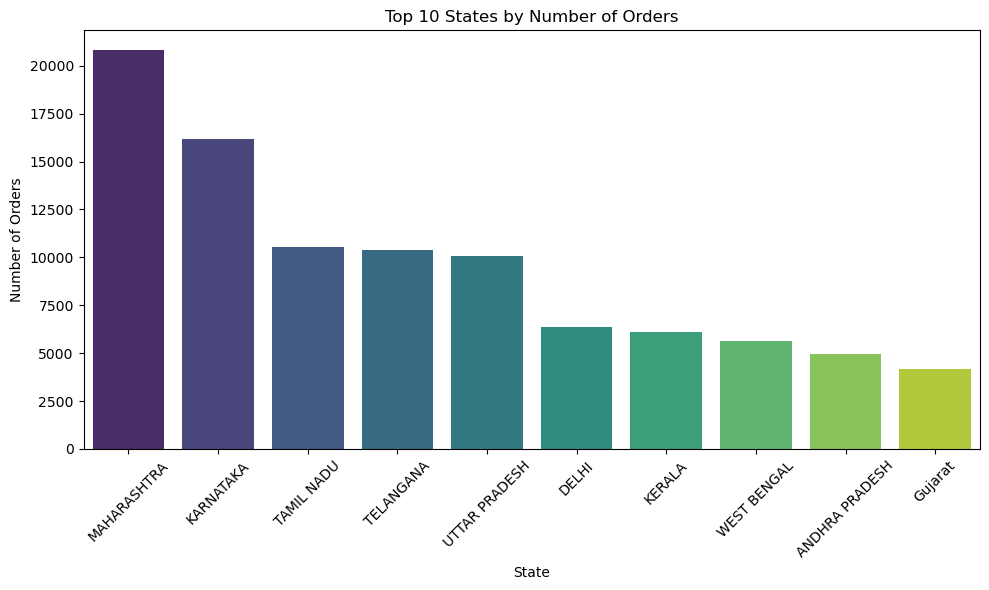

In [27]:

import seaborn as sns
import matplotlib.pyplot as plt


top_10_states = orders_per_state.sort_values(by='Number of Orders', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_states, x='state', y='Number of Orders', hue='state', palette='viridis')
plt.title('Top 10 States by Number of Orders')
plt.ylabel('Number of Orders')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Top 10 Selling SKUs'}, xlabel='SKU'>

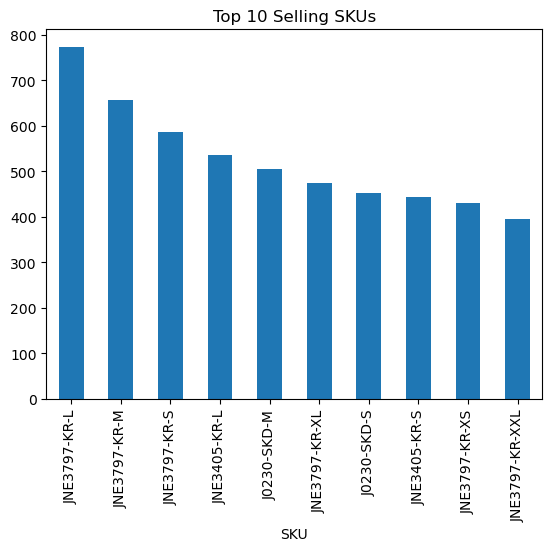

In [26]:
top_skus = df['SKU'].value_counts().head(10)
top_skus.plot(kind='bar', title='Top 10 Selling SKUs')


Text(0.5, 1.0, 'Cancelled vs Delivered Orders Over Time')

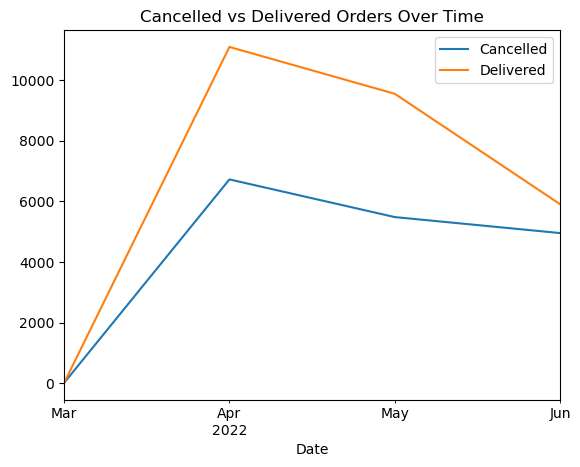

In [27]:
cancelled = df[df['Status'].str.contains('Cancelled', na=False)]
delivered = df[df['Status'].str.contains('Delivered', na=False)]

cancelled_per_month = cancelled.groupby(df['Date'].dt.to_period('M'))['Order ID'].nunique()
delivered_per_month = delivered.groupby(df['Date'].dt.to_period('M'))['Order ID'].nunique()

cancelled_per_month.plot(label='Cancelled')
delivered_per_month.plot(label='Delivered')
plt.legend()
plt.title('Cancelled vs Delivered Orders Over Time')


In [28]:
df['Fulfilment'].value_counts()

Fulfilment
Amazon      89691
Merchant    39277
Name: count, dtype: int64

<Axes: title={'center': 'Fulfilment Method Distribution'}, xlabel='Fulfilment'>

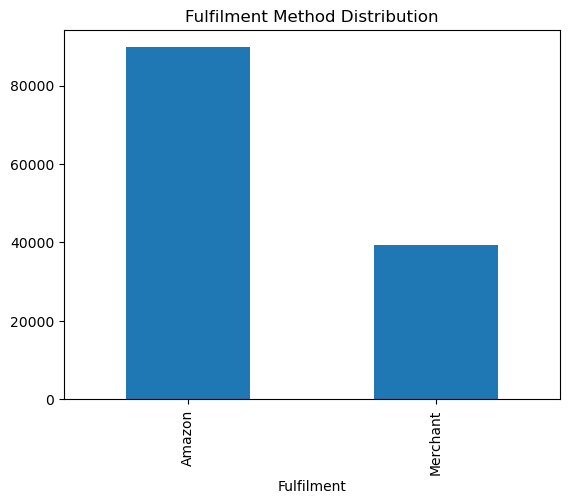

In [29]:
df['Fulfilment'].value_counts().plot(kind='bar', title='Fulfilment Method Distribution')


<Axes: title={'center': 'Top 30 States by Revenue'}, xlabel='ship-state'>

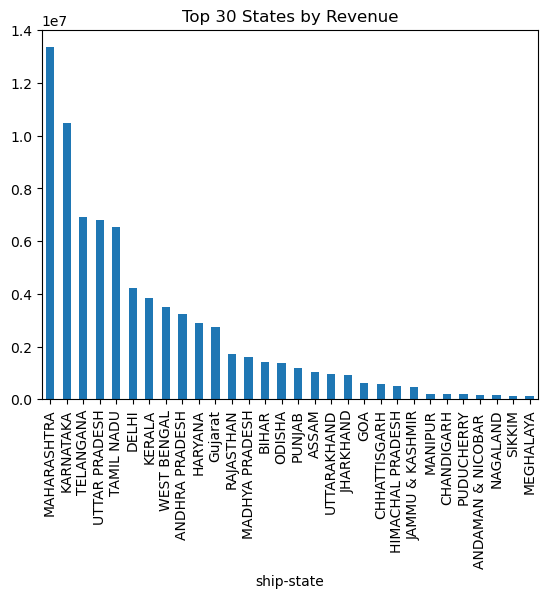

In [31]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
state_revenue = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(30)
state_revenue.plot(kind='bar', title='Top 30 States by Revenue')


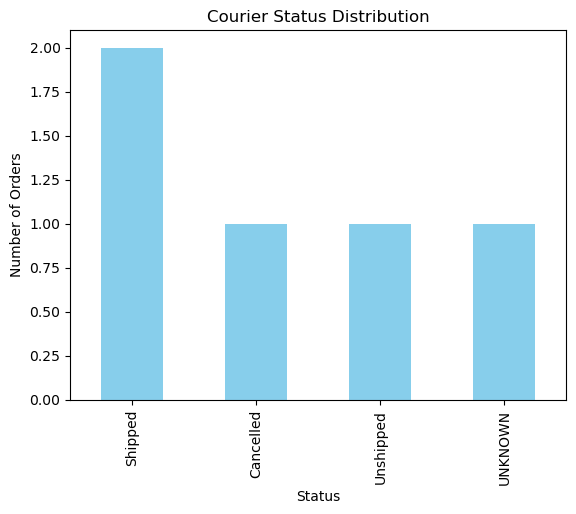

In [35]:
courier_status = pd.Series(['Shipped', 'Cancelled', 'Unshipped', 'Shipped', 'UNKNOWN'])

# Count frequencies including NaN
status_counts = courier_status.value_counts(dropna=False)

# Replace NaN with a label
status_counts.index = status_counts.index.fillna('Missing')

# Plotting
status_counts.plot(kind='bar', color='skyblue')
plt.title('Courier Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Orders')
plt.show()


In [32]:
df['Category'].value_counts()

Category
Set              50281
kurta            49873
Western Dress    15500
Top              10622
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64

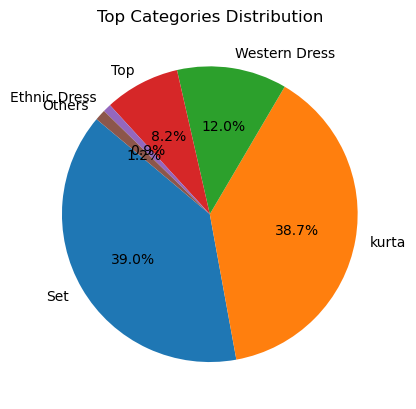

In [33]:
counts = df['Category'].value_counts()
top_categories = counts[:5]
others = counts[5:].sum()
top_categories['Others'] = others

top_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title('Top Categories Distribution')
plt.show()


(array([19083., 19097., 19113., 19127., 19144., 19158., 19174.]),
 [Text(19083.0, 0, '2022-04-01'),
  Text(19097.0, 0, '2022-04-15'),
  Text(19113.0, 0, '2022-05-01'),
  Text(19127.0, 0, '2022-05-15'),
  Text(19144.0, 0, '2022-06-01'),
  Text(19158.0, 0, '2022-06-15'),
  Text(19174.0, 0, '2022-07-01')])

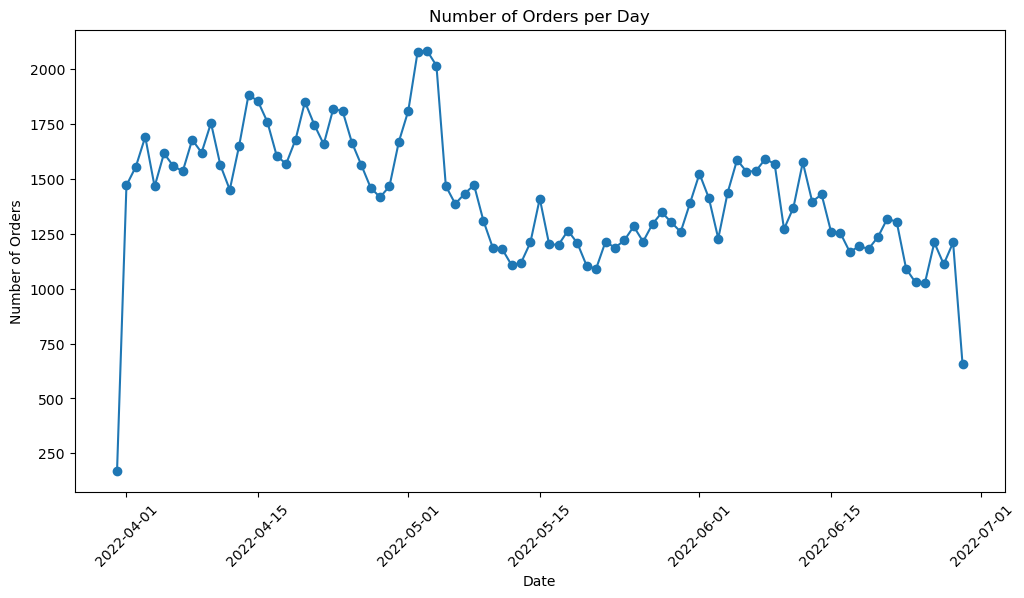

In [36]:
daily_orders = df.groupby('Date').size()

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_orders.index, daily_orders.values, marker='o', linestyle='-')
plt.title('Number of Orders per Day')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

In [37]:
df['B2B'].value_counts()

B2B
False    128097
True        871
Name: count, dtype: int64

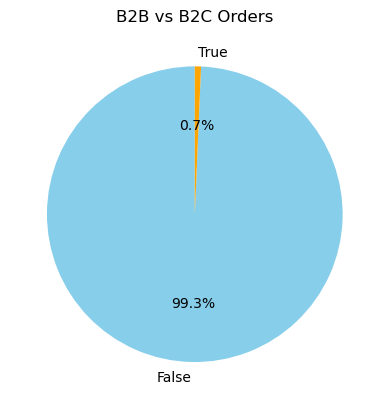

In [38]:
df['B2B'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('B2B vs B2C Orders')
plt.ylabel('')  # Hide y-label
plt.show()

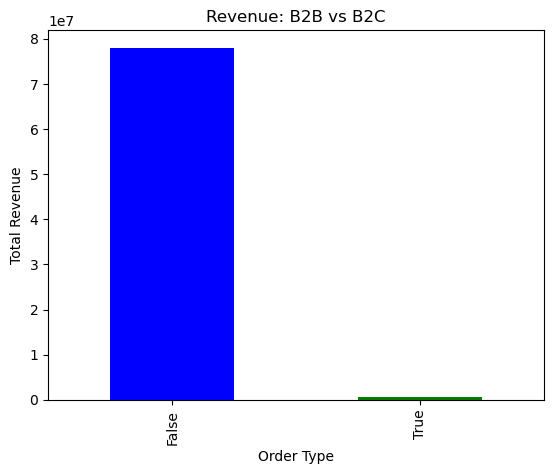

In [39]:
b2b_revenue = df.groupby('B2B')['Amount'].sum()
b2b_revenue.plot(kind='bar', color=['blue', 'green'])
plt.title('Revenue: B2B vs B2C')
plt.xlabel('Order Type')
plt.ylabel('Total Revenue')
plt.show()


In [ ]:
#conclusions
1. Maharashtra is the top-performing state by revenue, followed by Karnataka and Telangana.

2. Top ordered categories  are kurta ans sets

3. Delivered orders are consistently higher than cancelled orders throughout the observed months.
     Delivered  orders peaked in April 2022.

4. Amazon fulfilment  is used significantly more than merchant fulfilment, nearly double.
    This indicates preference for faster/more reliable delivery

5.  B2C (Business-to-Customer), accounting for 99.3% of the total orders, while only 0.7% are B2B (Business-to-Business).
    This indicates that the business primarily caters to individual customers rather than business clients, and B2B transactions 
    form only a very small fraction of the overall order volume.

6. B2C (False) generates the vast majority of the revenue, around 78 to 80 million.



  

In [7]:
df['Size']

0           S
1         3XL
2          XL
3           L
4         3XL
         ... 
128970     XL
128971      M
128972    XXL
128973     XS
128974      S
Name: Size, Length: 128975, dtype: object